In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import plotly.express as px

In [48]:
families = ['noise', 'truncated_urn', 'euclidean', 'resampling']
algos = ['basin_hopping', 'greedy_dp', 'pairs']
num_trials = 10

res_dir = os.path.join('results', 'heuristic_to_change_next_reference_metric', '30x60')

reports = []

for family in families:
    for algo in algos:
        directory = os.path.join(res_dir, family, algo)
        try:
            report = pd.read_csv(os.path.join(directory, 'report.csv'))
            report['family'] = family  
            report['algo'] = algo
            reports.append(report)
        except:
            print('No report.csv in', directory)
        

In [49]:
report = pd.concat(reports)

<Axes: >

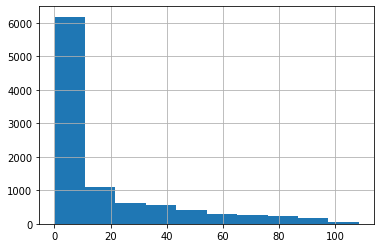

In [50]:
(report[report['algorithm'] == 'heuristic'])['dt'].hist()

<Axes: >

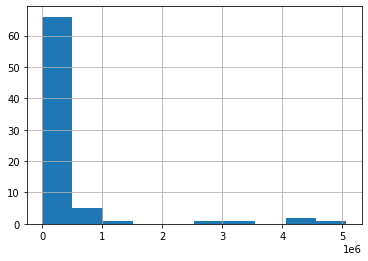

In [51]:
(report[report['algorithm'] == 'reference'])['dt'].hist()

In [52]:
df = report.groupby(['family', 'algo', 'algorithm', 'i_generated', 'i_trial']).count()
steps_df = df.loc[:, :, 'heuristic', :]
steps_df = steps_df.rename(columns={'dt': 'steps'})
steps_df = steps_df['steps']

In [53]:
steps_df

family         algo           i_generated  i_trial
euclidean      basin_hopping  0            0           1
                                           1           1
                                           2           1
                                           3           1
                                           4           1
                                                      ..
truncated_urn  pairs          3            4          48
                                           5          48
                                           6          48
                                           7          48
                                           8          28
Name: steps, Length: 759, dtype: int64

In [70]:
df = steps_df.groupby(level=[0, 1, 2]).agg([np.mean, np.std])
df

SyntaxError: invalid syntax (3141901050.py, line 1)

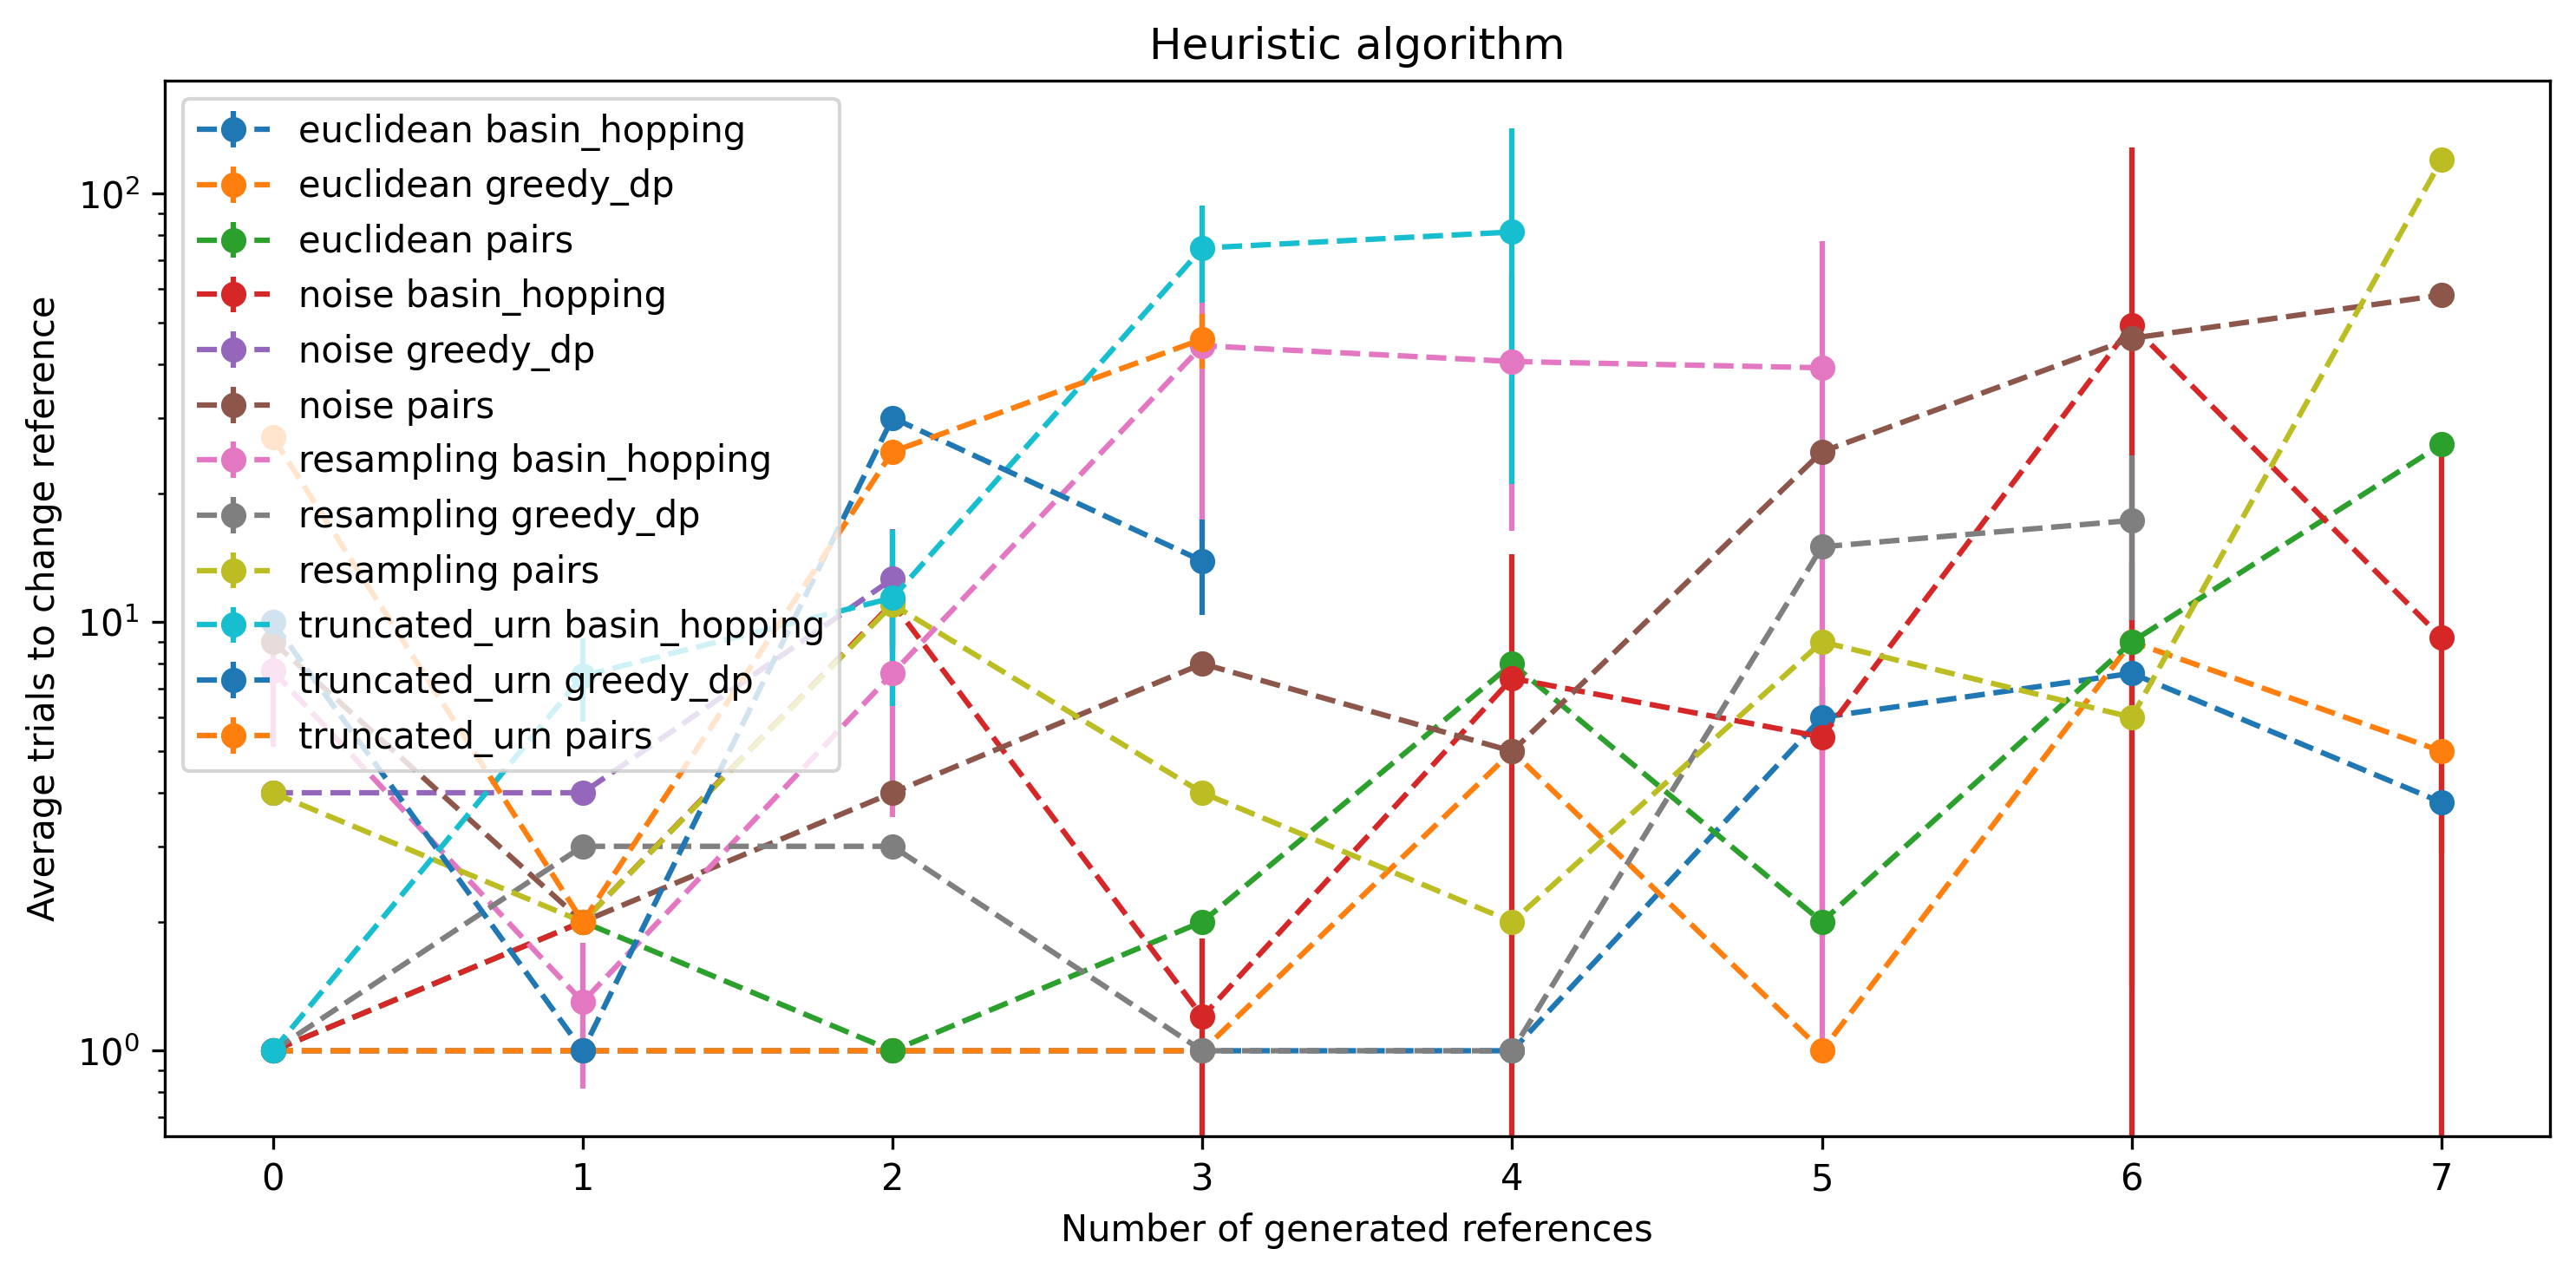

In [68]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 5))

for (family, algo), steps in df.groupby(level=(0, 1)):
    xs = steps.index.get_level_values(-1)
    ax.errorbar(xs, steps['mean'], steps['std'], label=f'{family} {algo}', fmt='--o')
    
ax.set_xlabel('Number of generated references')
ax.set_ylabel('Average trials to change reference')
ax.set_title('Heuristic algorithm')
ax.set_yscale('log')
ax.legend()
fig.tight_layout()

In [71]:
df = steps_df.groupby(level=[1, 2]).agg([np.mean, np.std])
df

mean        std
algo          i_generated                      
basin_hopping 0             2.675000   3.189627
              1             2.950000   2.809781
              2             7.775000   5.404118
              3            30.275000  35.598896
              4            28.648649  41.080690
              5            15.285714  24.950109
              6            28.500000  58.659140
              7             6.500000  12.037223
greedy_dp     0             4.000000   3.721042
              1             2.250000   1.315587
              2            11.605263  12.039439
              3             5.300000   6.481539
              4             3.000000   2.051957
              5             8.000000   7.181848
              6            12.411765   6.083367
              7             5.000000   0.000000
pairs         0            10.250000  10.212486
              1             2.000000   0.000000
              2            10.250000   9.374679
              3            14.153846  17.949547
              4             5.000000   2.491364
              5            12.000000   9.790918
              6            20.333333  18.501320
              7            68.000000  39.688442

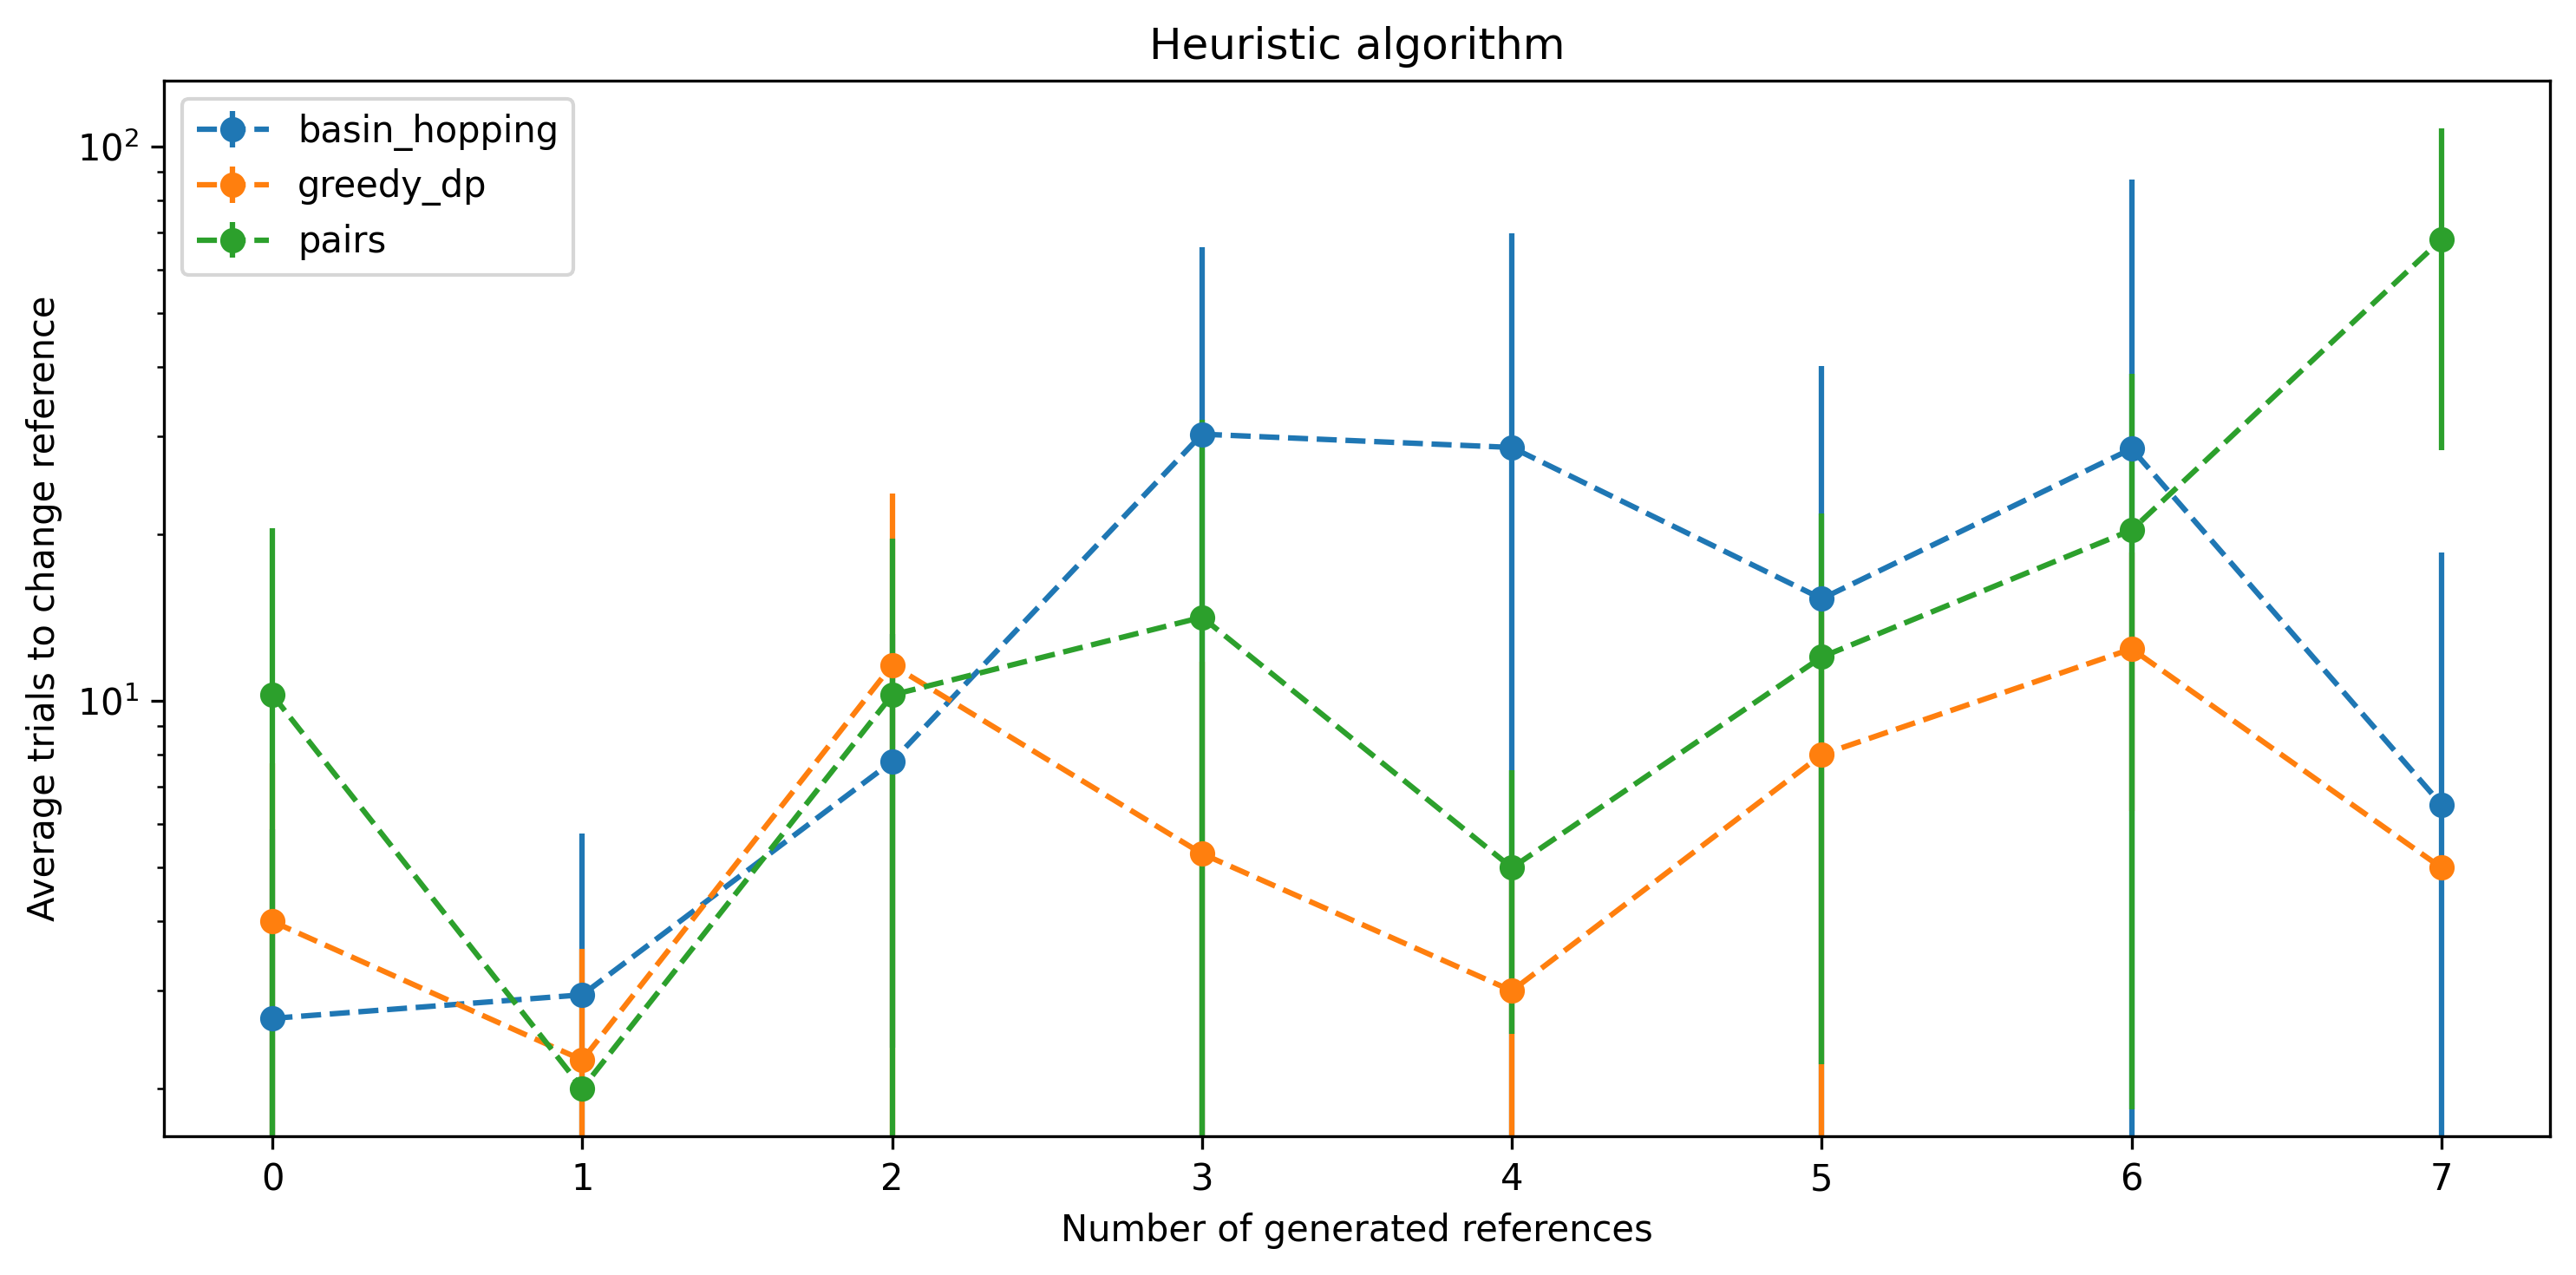

In [75]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 5))

for algo, steps in df.groupby(level=0):
    xs = steps.index.get_level_values(-1)
    ax.errorbar(xs, steps['mean'], steps['std'], label=f'{algo}', fmt='--o')
    
ax.set_xlabel('Number of generated references')
ax.set_ylabel('Average trials to change reference')
ax.set_title('Heuristic algorithm')
ax.set_yscale('log')
ax.legend()
fig.tight_layout()

In [81]:
fig = px.bar(df.reset_index(), x="i_generated", y="mean",
             color='algo', barmode='group',error_y="std",
            #  histfunc='avg',
             height=400)
fig.show()

# To reference

In [110]:
df = report.groupby(['family', 'algo', 'algorithm', 'i_generated']).mean()
df = df.loc[:, :, 'heuristic', :]
df['proportion'] = df['distance'] / df['reference_distance']
df = df['proportion']
df
# steps_df = df.loc[:, :, 'heuristic', :]
# steps_df = steps_df.rename(columns={'dt': 'steps'})
# steps_df = steps_df['steps']

family         algo           i_generated
euclidean      basin_hopping  0              1.000000
                              1              0.989505
                              2              0.998305
                              3              0.987287
                              4              0.794235
                                               ...   
truncated_urn  greedy_dp      3              0.564873
               pairs          0              0.501968
                              1              0.600329
                              2              0.397047
                              3              0.328930
Name: proportion, Length: 77, dtype: float64

In [104]:
(df.loc[:, :, 'heuristic', :]['distance'] / df.loc[:, :, 'heuristic', :]['reference_distance']).to_numpy()

array([1.        , 0.98950525, 0.99830508, 0.98728653, 0.79423503,
       0.6806184 , 0.57485732, 0.6326516 , 1.        , 0.70317003,
       0.83423423, 0.71903882, 0.69601874, 0.81265207, 0.67145594,
       0.66184211, 1.        , 0.69047619, 0.87431694, 0.67741935,
       0.57007126, 0.41262136, 0.35345805, 0.27877162, 0.675     ,
       0.70280612, 0.53615154, 0.72783934, 0.58174504, 0.53177734,
       0.48685261, 0.52322134, 0.675     , 0.69301994, 0.65968784,
       0.34364261, 0.34935065, 0.27994792, 0.26865183, 0.24502618,
       0.24042328, 0.19037681, 0.1531848 , 0.60676857, 0.73846154,
       0.647415  , 0.50225528, 0.44639616, 0.46787351, 0.69251337,
       0.67839687, 0.66864491, 0.68404908, 0.68488746, 0.63852814,
       0.63187809, 0.47281167, 0.444     , 0.41662338, 0.50933908,
       0.39528024, 0.33700367, 0.50101937, 0.24521605, 0.90751445,
       0.69611765, 0.60585878, 0.50122787, 0.45841862, 0.61857143,
       0.56441718, 0.5534359 , 0.5648731 , 0.50196759, 0.60032

In [100]:
df.loc[:, :, 'heuristic', :]['reference_distance']

family         algo           i_generated
euclidean      basin_hopping  0              902.0
                              1              667.0
                              2              531.0
                              3              527.0
                              4              451.0
                                             ...  
truncated_urn  greedy_dp      3              288.0
               pairs          0              320.0
                              1              304.0
                              2              298.0
                              3              285.0
Name: reference_distance, Length: 77, dtype: float64

In [106]:
df

distance  \
family        algo          algorithm i_generated               
euclidean     basin_hopping heuristic 0            902.000000   
                                      1            660.000000   
                                      2            530.100000   
                                      3            520.300000   
                                      4            358.200000   
...                                                       ...   
truncated_urn pairs         heuristic 3             93.745146   
                            reference 0            320.000000   
                                      1            304.000000   
                                      2            298.000000   
                                      3            285.000000   

                                                   reference_distance  
family        algo          algorithm i_generated                      
euclidean     basin_hopping heuristic 0                         902.0  
                                      1                         667.0  
                                      2                         531.0  
                                      3                         527.0  
                                      4                         451.0  
...                                                               ...  
truncated_urn pairs         heuristic 3                         285.0  
                            reference 0                         320.0  
                                      1                         304.0  
                                      2                         298.0  
                                      3                         285.0  

[154 rows x 2 columns]